In [1]:
import pandas as pd
import glob, os, json
import datetime
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [2]:
# Import sleep data
json_dir = 'JSON Files/Sleep'

json_pattern = os.path.join(json_dir, 'sleep*.json')
file_list = glob.glob(json_pattern)

dfs = []
for file in file_list:
    with open(file) as f:
        json_data = pd.json_normalize(json.loads(f.read()))
        json_data['site'] = file.rsplit("/", 1)[-1]
    dfs.append(json_data)
fitbit_df = pd.concat(dfs)

In [3]:
fitbit_df.isnull().sum(axis = 0)

logId                                         0
dateOfSleep                                   0
startTime                                     0
endTime                                       0
duration                                      0
minutesToFallAsleep                           0
minutesAsleep                                 0
minutesAwake                                  0
minutesAfterWakeup                            0
timeInBed                                     0
efficiency                                    0
type                                          0
infoCode                                      0
mainSleep                                     0
levels.summary.deep.count                     7
levels.summary.deep.minutes                   7
levels.summary.deep.thirtyDayAvgMinutes       7
levels.summary.wake.count                     7
levels.summary.wake.minutes                   7
levels.summary.wake.thirtyDayAvgMinutes       7
levels.summary.light.count              

In [4]:
# Add date, time, weekday
fitbit_df['wakeDate'] = pd.DatetimeIndex(fitbit_df['endTime']).date
fitbit_df['sleepDate'] = pd.DatetimeIndex(fitbit_df['startTime']).date
fitbit_df['wakeTime'] = pd.DatetimeIndex(fitbit_df['endTime']).time
fitbit_df['sleepTime'] = pd.DatetimeIndex(fitbit_df['startTime']).time
fitbit_df['Weekday'] = pd.DatetimeIndex(fitbit_df['endTime']).weekday
fitbit_df['hoursAsleep'] = (fitbit_df['minutesAsleep'] / 60)
fitbit_df

,logId,dateOfSleep,startTime,endTime,duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,timeInBed,efficiency,type,infoCode,mainSleep,levels.summary.deep.count,levels.summary.deep.minutes,levels.summary.deep.thirtyDayAvgMinutes,levels.summary.wake.count,levels.summary.wake.minutes,levels.summary.wake.thirtyDayAvgMinutes,levels.summary.light.count,levels.summary.light.minutes,levels.summary.light.thirtyDayAvgMinutes,levels.summary.rem.count,levels.summary.rem.minutes,levels.summary.rem.thirtyDayAvgMinutes,levels.data,levels.shortData,levels.summary.restless.count,levels.summary.restless.minutes,levels.summary.awake.count,levels.summary.awake.minutes,levels.summary.asleep.count,levels.summary.asleep.minutes,site,wakeDate,sleepDate,wakeTime,sleepTime,Weekday,hoursAsleep
0,28995147282,2020-09-23,2020-09-22T22:56:00.000,2020-09-23T06:57:30.000,28860000,0,418,63,0,481,95,stages,0,True,3.0,16.0,57.0,36.0,63.0,59.0,31.0,305.0,272.0,10.0,97.0,91.0,"[{'dateTime': '2020-09-22T22:56:00.000', 'leve...","[{'dateTime': '2020-09-22T22:56:00.000', 'leve...",NaN,NaN,NaN,NaN,NaN,NaN,Sleep\sleep-2020-08-24.json,2020-09-23,2020-09-22,06:57:30,22:56:00,2,6.966667
1,28981497960,2020-09-22,2020-09-21T22:32:30.000,2020-09-22T06:57:30.000,30300000,0,443,62,0,505,97,stages,0,True,6.0,72.0,56.0,40.0,62.0,58.0,32.0,285.0,271.0,12.0,86.0,92.0,"[{'dateTime': '2020-09-21T22:32:30.000', 'leve...","[{'dateTime': '2020-09-21T22:54:00.000', 'leve...",NaN,NaN,NaN,NaN,NaN,NaN,Sleep\sleep-2020-08-24.json,2020-09-22,2020-09-21,06:57:30,22:32:30,1,7.383333
2,28962967510,2020-09-21,2020-09-20T22:29:30.000,2020-09-21T06:33:30.000,29040000,0,435,49,0,484,98,stages,0,True,2.0,43.0,57.0,32.0,49.0,59.0,31.0,301.0,270.0,6.0,91.0,92.0,"[{'dateTime': '2020-09-20T22:29:30.000', 'leve...","[{'dateTime': '2020-09-20T22:31:00.000', 'leve...",NaN,NaN,NaN,NaN,NaN,NaN,Sleep\sleep-2020-08-24.json,2020-09-21,2020-09-20,06:33:30,22:29:30,0,7.250000
3,28950593738,2020-09-20,2020-09-19T22:53:00.000,2020-09-20T06:44:00.000,28260000,0,407,64,0,471,92,stages,0,True,5.0,38.0,58.0,27.0,64.0,59.0,28.0,254.0,271.0,8.0,115.0,91.0,"[{'dateTime': '2020-09-19T22:53:00.000', 'leve...","[{'dateTime': '2020-09-19T22:53:30.000', 'leve...",NaN,NaN,NaN,NaN,NaN,NaN,Sleep\sleep-2020-08-24.json,2020-09-20,2020-09-19,06:44:00,22:53:00,6,6.783333
4,28937970674,2020-09-19,2020-09-18T22:45:00.000,2020-09-19T06:04:30.000,26340000,0,400,39,0,439,95,stages,0,True,4.0,49.0,58.0,30.0,39.0,59.0,21.0,211.0,273.0,14.0,140.0,88.0,"[{'dateTime': '2020-09-18T22:45:00.000', 'leve...","[{'dateTime': '2020-09-18T23:11:30.000', 'leve...",NaN,NaN,NaN,NaN,NaN,NaN,Sleep\sleep-2020-08-24.json,2020-09-19,2020-09-18,06:04:30,22:45:00,5,6.666667
5,28926491507,2020-09-18,2020-09-17T23:03:00.000,2020-09-18T06:53:00.000,28200000,0,419,51,0,470,98,stages,0,True,4.0,37.0,59.0,34.0,51.0,60.0,34.0,303.0,272.0,9.0,79.0,89.0,"[{'dateTime': '2020-09-17T23:03:00.000', 'leve...","[{'dateTime': '2020-09-17T23:48:30.000', 'leve...",NaN,NaN,NaN,NaN,NaN,NaN,Sleep\sleep-2020-08-24.json,2020-09-18,2020-09-17,06:53:00,23:03:00,4,6.983333
6,28910515393,2020-09-17,2020-09-16T22:40:00.000,2020-09-17T06:18:30.000,27480000,0,401,57,0,458,97,stages,0,True,4.0,70.0,59.0,29.0,57.0,60.0,26.0,239.0,274.0,10.0,92.0,88.0,"[{'dateTime': '2020-09-16T22:40:00.000', 'leve...","[{'dateTime': '2020-09-16T22:54:00.000', 'leve...",NaN,NaN,NaN,NaN,NaN,NaN,Sleep\sleep-2020-08-24.json,2020-09-17,2020-09-16,06:18:30,22:40:00,3,6.683333
7,28894897276,2020-09-16,2020-09-15T21:46:00.000,2020-09-16T06:14:30.000,30480000,0,451,57,0,508,94,stages,0,True,6.0,60.0,59.0,34.0,57.0,60.0,34.0,283.0,273.0,8.0,108.0,87.0,"[{'dateTime': '2020-09-15T21:46:00.000', 'leve...","[{'dateTime': '2020-09-15T21:50:00.000', 'leve...",NaN,NaN,NaN,NaN,NaN,NaN,Sleep\sleep-2020-08-24.json,2020-09-16,2020-09-15,06:14:30,21:46:00,2,7.516667
8,28886258887,2020-09-15,2020-09-14T21:50:30.000,2020-09-15T06:25:30.000,30900000,0,453,62,0,515,93,stages,0,True,3.0,52.0,59.0,29.0,62.0,60.0,2

In [24]:
# Import sleep score table
sleep_score_df = pd.read_csv('JSON Files/Sleep/sleep_score.csv')
sleep_score_df['Date'] = pd.DatetimeIndex(sleep_score_df['timestamp']).date
sleep_score_df['Time'] = pd.DatetimeIndex(sleep_score_df['timestamp']).time
sleep_score_df['Weekday'] = pd.DatetimeIndex(sleep_score_df['timestamp']).weekday
sleep_score_df

,sleep_log_entry_id,timestamp,overall_score,composition_score,revitalization_score,duration_score,deep_sleep_in_minutes,resting_heart_rate,restlessness,Date,Time,Weekday
0,35497797079,2022-01-28T06:10:30Z,85,18,21,46,79,62,0.079249,2022-01-28,06:10:30,4
1,35479288194,2022-01-27T06:33:30Z,82,19,19,44,44,62,0.108007,2022-01-27,06:33:30,3
2,35464273333,2022-01-26T06:20:30Z,84,19,20,45,51,61,0.114169,2022-01-26,06:20:30,2
3,35451250023,2022-01-25T06:24:30Z,84,19,20,45,85,61,0.090155,2022-01-25,06:24:30,1
4,35435987736,2022-01-24T06:03:30Z,87,20,21,46,35,59,0.101917,2022-01-24,06:03:30,0
5,35277565325,2022-01-12T05:49:30Z,61,14,8,39,36,59,0.207871,2022-01-12,05:49:30,2
6,35270594983,2022-01-11T18:44:30Z,41,12,7,22,12,57,0.228637,2022-01-11,18:44:30,1
7,35265207299,2022-01-11T06:28:00Z,60,16,10,34,57,57,0.185444,2022-01-11,06:28:00,1
8,35248454426,2022-01-10T06:20:30Z,77,16,22,39,64,59,0.090909,2022-01-10,06:20:30,0
9,35237633172,2022-01-09T07:36:00Z,76,18,15,43,51,57,0.134203,2022-01-09,07:36:00,6


In [43]:
sleep_times_df = fitbit_df[['logId', 'dateOfSleep', 'minutesAsleep', 'levels.summary.deep.minutes', 'levels.summary.wake.minutes', 'levels.summary.light.minutes', 'levels.summary.rem.minutes']]
sleep_times_df = sleep_times_df.set_index('logId')
sleep_times_df[['minutesAsleep', 'levels.summary.deep.minutes', 'levels.summary.wake.minutes', 'levels.summary.light.minutes', 'levels.summary.rem.minutes']] = sleep_times_df[['minutesAsleep', 'levels.summary.deep.minutes', 'levels.summary.wake.minutes', 'levels.summary.light.minutes', 'levels.summary.rem.minutes']] / 60
sleep_times_df = sleep_times_df.rename(columns={'dateOfSleep':'Sleep_Date', 'minutesAsleep':'Hours Asleep', 'levels.summary.deep.minutes':'Deep Sleep', 'levels.summary.wake.minutes':'Awake', 'levels.summary.light.minutes':'Light Sleep', 'levels.summary.rem.minutes':'REM'})
sleep_times_df.reset_index(inplace=True)

In [44]:
sleep_times_df

,logId,Sleep_Date,Hours Asleep,Deep Sleep,Awake,Light Sleep,REM
0,28995147282,2020-09-23,6.966667,0.266667,1.050000,5.083333,1.616667
1,28981497960,2020-09-22,7.383333,1.200000,1.033333,4.750000,1.433333
2,28962967510,2020-09-21,7.250000,0.716667,0.816667,5.016667,1.516667
3,28950593738,2020-09-20,6.783333,0.633333,1.066667,4.233333,1.916667
4,28937970674,2020-09-19,6.666667,0.816667,0.650000,3.516667,2.333333
5,28926491507,2020-09-18,6.983333,0.616667,0.850000,5.050000,1.316667
6,28910515393,2020-09-17,6.683333,1.166667,0.950000,3.983333,1.533333
7,28894897276,2020-09-16,7.516667,1.000000,0.950000,4.716667,1.800000
8,28886258887,2020-09-15,7.550000,0.866667,1.033333,4.616667,2.066667
9,28870872506,2020-09-14,7.916667,0.783333,1.033333,5.133333,2.000000


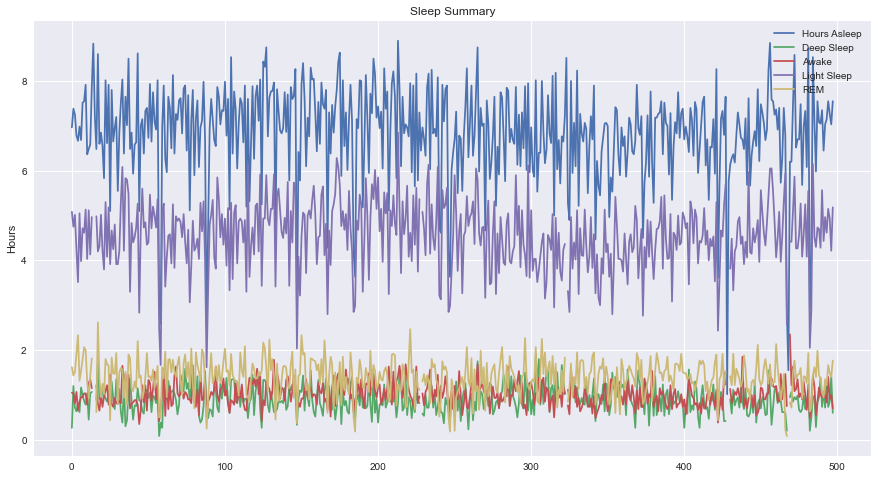

In [49]:
# Plot sleep and wake times
sleep_plot_df = sleep_times_df.drop(columns=['logId'])
plt.style.use('seaborn')


sleep_times = sleep_plot_df.plot(figsize=(15,8))
sleep_times.set_title("Sleep Summary")
sleep_times.set_ylabel("Hours")
plt.show()

In [33]:
# Merge sleep score and sleep times dataframes
sleep_times_scores_df = pd.merge(sleep_times_df, sleep_score_df, left_on='logId', right_on='sleep_log_entry_id', how='left')
sleep_times_scores_df

,logId,Sleep Date,Hours Asleep,Deep Sleep,Awake,Light Sleep,REM,sleep_log_entry_id,timestamp,overall_score,composition_score,revitalization_score,duration_score,deep_sleep_in_minutes,resting_heart_rate,restlessness,Date,Time,Weekday
0,28995147282,2020-09-23,6.966667,0.266667,1.050000,5.083333,1.616667,2.899515e+10,2020-09-23T06:57:30Z,76.0,18.0,20.0,38.0,16.0,61.0,0.081505,2020-09-23,06:57:30,2.0
1,28981497960,2020-09-22,7.383333,1.200000,1.033333,4.750000,1.433333,2.898150e+10,2020-09-22T06:57:30Z,81.0,19.0,21.0,41.0,71.0,63.0,0.090010,2020-09-22,06:57:30,1.0
2,28962967510,2020-09-21,7.250000,0.716667,0.816667,5.016667,1.516667,2.896297e+10,2020-09-21T06:33:30Z,83.0,19.0,22.0,42.0,43.0,64.0,0.077399,2020-09-21,06:33:30,0.0
3,28950593738,2020-09-20,6.783333,0.633333,1.066667,4.233333,1.916667,2.895059e+10,2020-09-20T06:44:00Z,78.0,20.0,19.0,39.0,38.0,64.0,0.090408,2020-09-20,06:44:00,6.0
4,28937970674,2020-09-19,6.666667,0.816667,0.650000,3.516667,2.333333,2.893797e+10,2020-09-19T06:04:30Z,82.0,20.0,23.0,39.0,49.0,65.0,0.065593,2020-09-19,06:04:30,5.0
5,28926491507,2020-09-18,6.983333,0.616667,0.850000,5.050000,1.316667,2.892649e+10,2020-09-18T06:53:00Z,79.0,18.0,22.0,39.0,37.0,65.0,0.080906,2020-09-18,06:53:00,4.0
6,28910515393,2020-09-17,6.683333,1.166667,0.950000,3.983333,1.533333,2.891052e+10,2020-09-17T06:18:30Z,82.0,21.0,23.0,38.0,70.0,65.0,0.062570,2020-09-17,06:18:30,3.0
7,28894897276,2020-09-16,7.516667,1.000000,0.950000,4.716667,1.800000,2.889490e+10,2020-09-16T06:14:30Z,84.0,21.0,22.0,41.0,60.0,65.0,0.081613,2020-09-16,06:14:30,2.0
8,28886258887,2020-09-15,7.550000,0.866667,1.033333,4.616667,2.066667,2.888626e+10,2020-09-15T06:25:30Z,82.0,21.0,20.0,41.0,52.0,67.0,0.096993,2020-09-15,06:25:30,1.0
9,28870872506,2020-09-14,7.916667,0.783333,1.033333,5.133333,2.000000,2.887087e+10,2020-09-14T06:33:30Z,85.0,21.0,21.0,43.0,46.0,68.0,0.090029,2020-09-14,06:33:30,0.0


In [39]:
# Hours by overall score
sleep_analysis_df = sleep_times_scores_df.groupby('overall_score')['Hours Asleep','Deep Sleep','Awake','Light Sleep','REM'].mean()
sleep_analysis_df

<ipython-input-39-ffabcb599c00>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sleep_analysis_df = sleep_times_scores_df.groupby('overall_score')['Hours Asleep','Deep Sleep','Awake','Light Sleep','REM'].mean()


,Hours Asleep,Deep Sleep,Awake,Light Sleep,REM
overall_score,,,,,
41.0,2.850000,0.200000,0.750000,2.566667,0.083333
46.0,5.100000,0.750000,1.450000,3.916667,0.433333
49.0,2.583333,0.383333,0.700000,1.666667,0.533333
51.0,5.116667,1.016667,1.633333,3.250000,0.850000
52.0,2.733333,0.333333,0.666667,2.033333,0.366667
53.0,3.633333,0.466667,0.883333,2.983333,0.183333
56.0,3.841667,0.350000,0.808333,2.808333,0.683333
59.0,5.316667,0.833333,1.383333,3.633333,0.850000
60.0,6.200000,0.950000,2.350000,4.416667,0.833333


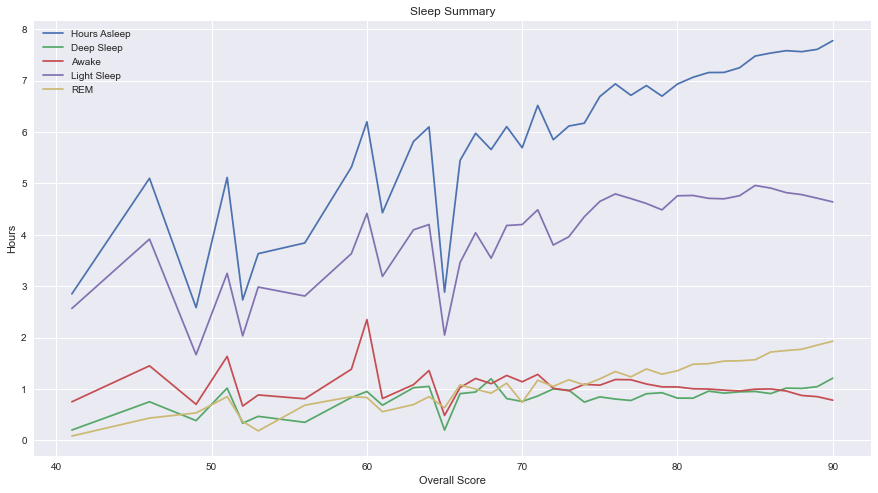

In [40]:
# Sleep score plot
plt.style.use('seaborn')

sleep_times = sleep_analysis_df.plot(figsize=(15,8))
sleep_times.set_title("Sleep Summary")
sleep_times.set_xlabel("Overall Score")
sleep_times.set_ylabel("Hours")
plt.show()